In [1]:
import requests, xmltodict, json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

c:\Users\173ch\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
with open('./datas/SRT_KEY.txt', 'r') as file:
    service_key = file.read()

### channel_sales (발매채널별 승차권 발매현황)

최초에 2022.01.01부터 시도했는데 아무것도 추출되지않아서, 1달 단위로 확인한 결과 2022.08.01부터 추출되기 시작했다

In [4]:
c_url1 = 'https://apis.data.go.kr/B553912/tk_sales/v1/channel_sales?serviceKey='+service_key+'&page=1&perPage=20000&cond%5BRUN_YMD%3A%3ALT%5D=20231231&cond%5BRUN_YMD%3A%3ALTE%5D=20231231&cond%5BRUN_YMD%3A%3AGT%5D=20220801&cond%5BRUN_YMD%3A%3AGTE%5D=20220101'
c_url2 = 'https://apis.data.go.kr/B553912/tk_sales/v1/channel_sales?serviceKey='+service_key+'&page=2&perPage=20000&cond%5BRUN_YMD%3A%3ALT%5D=20231231&cond%5BRUN_YMD%3A%3ALTE%5D=20231231&cond%5BRUN_YMD%3A%3AGT%5D=20220801&cond%5BRUN_YMD%3A%3AGTE%5D=20220101'
c_url3 = 'https://apis.data.go.kr/B553912/tk_sales/v1/channel_sales?serviceKey='+service_key+'&page=3&perPage=20000&cond%5BRUN_YMD%3A%3ALT%5D=20231231&cond%5BRUN_YMD%3A%3ALTE%5D=20231231&cond%5BRUN_YMD%3A%3AGT%5D=20220801&cond%5BRUN_YMD%3A%3AGTE%5D=20220101'
c_url4 = 'https://apis.data.go.kr/B553912/tk_sales/v1/channel_sales?serviceKey='+service_key+'&page=4&perPage=20000&cond%5BRUN_YMD%3A%3ALT%5D=20231231&cond%5BRUN_YMD%3A%3ALTE%5D=20231231&cond%5BRUN_YMD%3A%3AGT%5D=20220801&cond%5BRUN_YMD%3A%3AGTE%5D=20220101'
c_url5 = 'https://apis.data.go.kr/B553912/tk_sales/v1/channel_sales?serviceKey='+service_key+'&page=5&perPage=20000&cond%5BRUN_YMD%3A%3ALT%5D=20231231&cond%5BRUN_YMD%3A%3ALTE%5D=20231231&cond%5BRUN_YMD%3A%3AGT%5D=20220801&cond%5BRUN_YMD%3A%3AGTE%5D=20220101'
c_url6 = 'https://apis.data.go.kr/B553912/tk_sales/v1/channel_sales?serviceKey='+service_key+'&page=6&perPage=20000&cond%5BRUN_YMD%3A%3ALT%5D=20231231&cond%5BRUN_YMD%3A%3ALTE%5D=20231231&cond%5BRUN_YMD%3A%3AGT%5D=20220801&cond%5BRUN_YMD%3A%3AGTE%5D=20220101'
c_url7 = 'https://apis.data.go.kr/B553912/tk_sales/v1/channel_sales?serviceKey='+service_key+'&page=7&perPage=20000&cond%5BRUN_YMD%3A%3ALT%5D=20231231&cond%5BRUN_YMD%3A%3ALTE%5D=20231231&cond%5BRUN_YMD%3A%3AGT%5D=20220801&cond%5BRUN_YMD%3A%3AGTE%5D=20220101'
c_url8 = 'https://apis.data.go.kr/B553912/tk_sales/v1/channel_sales?serviceKey='+service_key+'&page=8&perPage=20000&cond%5BRUN_YMD%3A%3ALT%5D=20231231&cond%5BRUN_YMD%3A%3ALTE%5D=20231231&cond%5BRUN_YMD%3A%3AGT%5D=20220801&cond%5BRUN_YMD%3A%3AGTE%5D=20220101'

In [5]:
response = requests.get(c_url1)
c_df1 = pd.DataFrame(json.loads(response.content)['data'])

response = requests.get(c_url2)
c_df2 = pd.DataFrame(json.loads(response.content)['data'])

response = requests.get(c_url3)
c_df3 = pd.DataFrame(json.loads(response.content)['data'])

response = requests.get(c_url4)
c_df4 = pd.DataFrame(json.loads(response.content)['data'])

response = requests.get(c_url5)
c_df5 = pd.DataFrame(json.loads(response.content)['data'])

response = requests.get(c_url6)
c_df6 = pd.DataFrame(json.loads(response.content)['data'])

response = requests.get(c_url7)
c_df7 = pd.DataFrame(json.loads(response.content)['data'])

response = requests.get(c_url8)
c_df8 = pd.DataFrame(json.loads(response.content)['data'])

c_dfs = [c_df1, c_df2, c_df3, c_df4, c_df5, c_df6, c_df7, c_df8]
c_df = pd.concat(c_dfs)

In [6]:
c_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137310 entries, 0 to 17309
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   PRT_CMPTN_QNTY        137310 non-null  int64 
 1   RFND_QNTY             137310 non-null  int64 
 2   ROUTE_NM              137310 non-null  object
 3   RUN_YMD               137310 non-null  object
 4   SELLNG_QNTY           137310 non-null  int64 
 5   SELLNG_WICKET_KND_CD  137310 non-null  object
 6   SELLNG_WICKET_KND_NM  137310 non-null  object
 7   SELLNG_YMD            137310 non-null  object
dtypes: int64(3), object(5)
memory usage: 9.4+ MB


In [7]:
c_df.isnull().sum()

PRT_CMPTN_QNTY          0
RFND_QNTY               0
ROUTE_NM                0
RUN_YMD                 0
SELLNG_QNTY             0
SELLNG_WICKET_KND_CD    0
SELLNG_WICKET_KND_NM    0
SELLNG_YMD              0
dtype: int64

In [8]:
c_df.columns = ['인쇄완료수량','환불수량','노선명','운행일자','발매수량','발매창구종류코드','발매창구종류명','발매일자']
c_df.head()

,인쇄완료수량,환불수량,노선명,운행일자,발매수량,발매창구종류코드,발매창구종류명,발매일자
0,97,30,경부선,20220802,129,0011,역,20220801
1,4,0,경부선,20220802,4,0022,TMO(군장병 철도수송지원반),20220801
2,61,19,경부선,20220802,80,0027,철도공사 자회사 위탁운영역,20220801
3,8,1,경부선,20220802,9,0036,현금ATM,20220801
4,10,5,경부선,20220802,15,0037,Tablet(자동발매기),20220801


c:\Users\173ch\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\173ch\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='발매창구종류명', ylabel='count'>

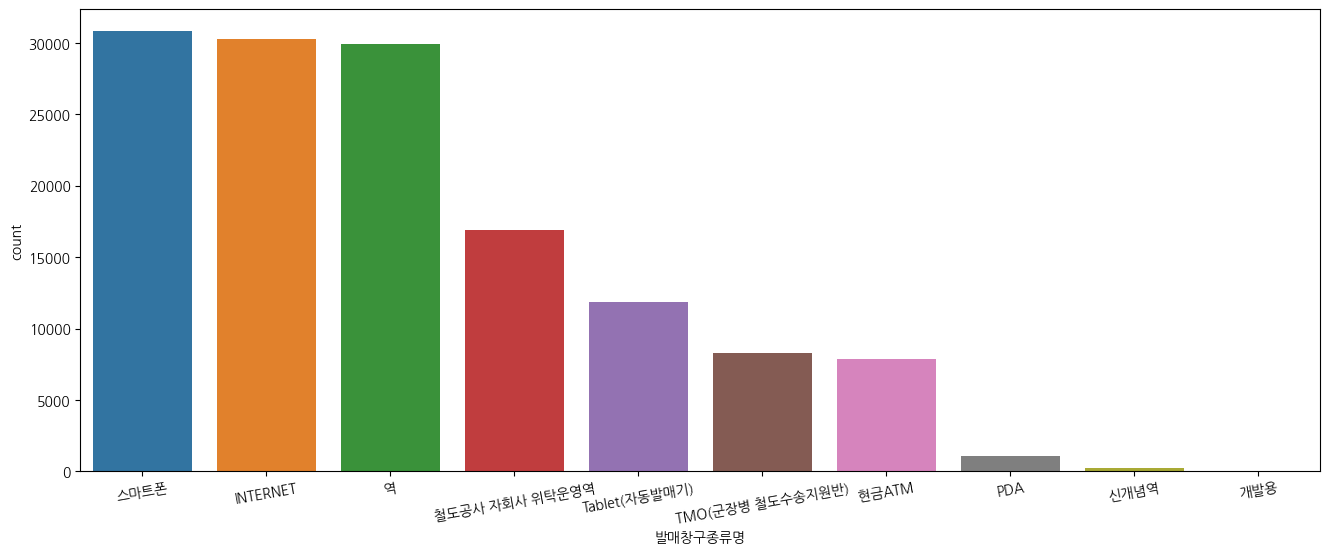

In [9]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=10)
sns.countplot(x='발매창구종류명', data=c_df, order=c_df['발매창구종류명'].value_counts().index)

In [22]:
total_q = c_df['발매수량'].sum()
print("총 발매수량:",total_q)

total_p = c_df['인쇄완료수량'].sum()
print("총 인쇄완료수량:",total_p)

total_r = c_df['환불수량'].sum()
print("총 환불수량:", total_r)

print("전체 인쇄완료비율:", round(total_p/total_q*100, 2))
print("전체 환불비율:", round(total_r/total_q*100, 2))
print("미환불 미인쇄 비율:", round(100-(57.13+42.06), 2))

총 발매수량: 61133265
총 인쇄완료수량: 34925652
총 환불수량: 25713305
전체 인쇄완료비율: 57.13
전체 환불비율: 42.06
미환불 미인쇄 비율: 0.81


환불 비율이 생각보다 높다는 점에서 더 자세히 이유를 알아볼 필요성이 있음

인쇄완료가 반드시 환불이 아님을 의미하는 걸까?

0.81%는 인쇄도 안하고 환불도 안했으므로 모바일 티켓을 가지고 탄 사람이라고 생각하면 되는 걸까?

하지만 티켓을 출력하는 사람보다 모바일 티켓을 이용하는 사람이 많을 것 같은데 이 수치는 말이 안된다

### srt_station_sales (SR 운영역 승차권 발매현황)


In [41]:
s_url1 = 'https://apis.data.go.kr/B553912/tk_sales/v1/srt_station_sales?serviceKey='+service_key+'&page=1&perPage=20000&cond%5BRUN_YMD%3A%3ALT%5D=20231231&cond%5BRUN_YMD%3A%3ALTE%5D=20231231&cond%5BRUN_YMD%3A%3AGT%5D=20220101&cond%5BRUN_YMD%3A%3AGTE%5D=20220101'
response = requests.get(s_url1)
json.loads(response.content)

{'currentCount': 20000,
 'data': [{'PRT_CMPTN_QNTY': 635,
   'RFND_QNTY': 81,
   'ROUTE_NM': '경부선',
   'RUN_YMD': '20220801',
   'SELLNG_QNTY': 732,
   'SELLNG_STN_CD': '0551',
   'SELLNG_STN_NM': '수서',
   'SELLNG_YMD': '20220801'},
  {'PRT_CMPTN_QNTY': 92,
   'RFND_QNTY': 6,
   'ROUTE_NM': '경부선',
   'RUN_YMD': '20220801',
   'SELLNG_QNTY': 98,
   'SELLNG_STN_CD': '0552',
   'SELLNG_STN_NM': '동탄',
   'SELLNG_YMD': '20220801'},
  {'PRT_CMPTN_QNTY': 129,
   'RFND_QNTY': 11,
   'ROUTE_NM': '경부선',
   'RUN_YMD': '20220801',
   'SELLNG_QNTY': 141,
   'SELLNG_STN_CD': '0553',
   'SELLNG_STN_NM': '지제',
   'SELLNG_YMD': '20220801'},
  {'PRT_CMPTN_QNTY': 310,
   'RFND_QNTY': 59,
   'ROUTE_NM': '호남선',
   'RUN_YMD': '20220801',
   'SELLNG_QNTY': 374,
   'SELLNG_STN_CD': '0551',
   'SELLNG_STN_NM': '수서',
   'SELLNG_YMD': '20220801'},
  {'PRT_CMPTN_QNTY': 66,
   'RFND_QNTY': 4,
   'ROUTE_NM': '호남선',
   'RUN_YMD': '20220801',
   'SELLNG_QNTY': 70,
   'SELLNG_STN_CD': '0552',
   'SELLNG_STN_NM': '동탄',

In [59]:
s_url1 = 'https://apis.data.go.kr/B553912/tk_sales/v1/srt_station_sales?serviceKey='+service_key+'&page=1&perPage=20000&cond%5BRUN_YMD%3A%3ALT%5D=20231231&cond%5BRUN_YMD%3A%3ALTE%5D=20231231&cond%5BRUN_YMD%3A%3AGT%5D=20220101&cond%5BRUN_YMD%3A%3AGTE%5D=20220101'
s_url2 = 'https://apis.data.go.kr/B553912/tk_sales/v1/srt_station_sales?serviceKey='+service_key+'&page=2&perPage=20000&cond%5BRUN_YMD%3A%3ALT%5D=20231231&cond%5BRUN_YMD%3A%3ALTE%5D=20231231&cond%5BRUN_YMD%3A%3AGT%5D=20220101&cond%5BRUN_YMD%3A%3AGTE%5D=20220101'
s_url3 = 'https://apis.data.go.kr/B553912/tk_sales/v1/srt_station_sales?serviceKey='+service_key+'&page=3&perPage=20000&cond%5BRUN_YMD%3A%3ALT%5D=20231231&cond%5BRUN_YMD%3A%3ALTE%5D=20231231&cond%5BRUN_YMD%3A%3AGT%5D=20220101&cond%5BRUN_YMD%3A%3AGTE%5D=20220101'

response = requests.get(s_url1)
s_df1 = pd.DataFrame(json.loads(response.content)['data'])
response = requests.get(s_url2)
s_df2 = pd.DataFrame(json.loads(response.content)['data'])
response = requests.get(s_url3)
s_df3 = pd.DataFrame(json.loads(response.content)['data'])

s_dfs = [s_df1, s_df2, s_df3]
s_df = pd.concat(s_dfs)

In [60]:
s_df.isnull().sum()

PRT_CMPTN_QNTY    0
RFND_QNTY         0
ROUTE_NM          0
RUN_YMD           0
SELLNG_QNTY       0
SELLNG_STN_CD     0
SELLNG_STN_NM     0
SELLNG_YMD        0
dtype: int64

In [111]:
s_df.columns = ['인쇄완료수량','환불수량','노선명','운행일자','발매수량','발매역코드','발매역명','발매일자']
s_df.head()


,인쇄완료수량,환불수량,노선명,운행일자,발매수량,발매역코드,발매역명,발매일자
0,635,81,경부선,20220801,732,0551,수서,20220801
1,92,6,경부선,20220801,98,0552,동탄,20220801
2,129,11,경부선,20220801,141,0553,지제,20220801
3,310,59,호남선,20220801,374,0551,수서,20220801
4,66,4,호남선,20220801,70,0552,동탄,20220801


In [70]:
s_df['발매역명'].unique()

array(['수서', '동탄', '지제'], dtype=object)

c:\Users\173ch\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\173ch\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='발매역명', ylabel='count'>

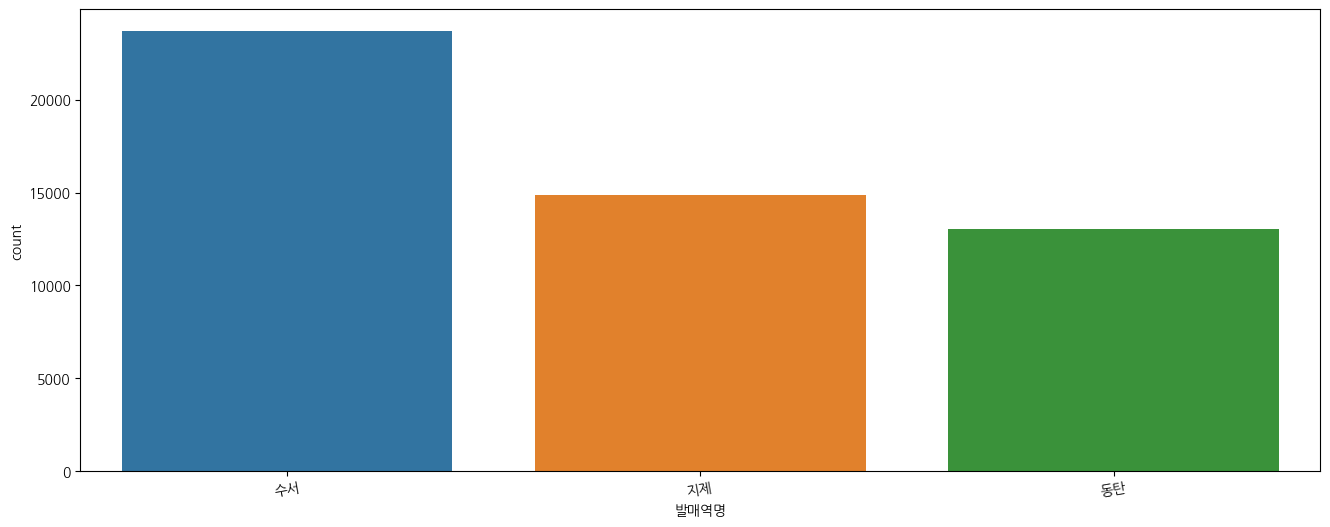

In [69]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=10)
sns.countplot(x='발매역명', data=s_df, order=s_df['발매역명'].value_counts().index)

### yearly_sales (연도별 SR 승차권 발매현황)


In [74]:
y_url1 = 'https://apis.data.go.kr/B553912/tk_sales/v1/yearly_sales?serviceKey='+service_key+'&page=1&perPage=20000&cond%5BRUN_YR%3A%3ALT%5D=2023&cond%5BRUN_YR%3A%3ALTE%5D=2023&cond%5BRUN_YR%3A%3AGT%5D=2021&cond%5BRUN_YR%3A%3AGTE%5D=2021'
response = requests.get(y_url1)
json.loads(response.content)

{'currentCount': 2,
 'data': [{'PRT_CMPTN_QNTY': 7243153,
   'RFND_QNTY': 4992679,
   'ROUTE_NM': '경부선',
   'RUN_YR': '2022',
   'SELLNG_QNTY': 12330420},
  {'PRT_CMPTN_QNTY': 2803787,
   'RFND_QNTY': 2002003,
   'ROUTE_NM': '호남선',
   'RUN_YR': '2022',
   'SELLNG_QNTY': 4854346}],
 'matchCount': 2,
 'page': 1,
 'perPage': 20000,
 'totalCount': 4}

In [75]:
y_df = pd.DataFrame(json.loads(response.content)['data'])
y_df.head()

,PRT_CMPTN_QNTY,RFND_QNTY,ROUTE_NM,RUN_YR,SELLNG_QNTY
0,7243153,4992679,경부선,2022,12330420
1,2803787,2002003,호남선,2022,4854346


### room_class_passengers (특실/일반실 승차인원)


In [82]:
r_url = 'https://apis.data.go.kr/B553912/tk_sales/v1/room_class_passengers?serviceKey='+service_key+'&perPage=100&cond%5BRUN_YM%3A%3ALT%5D=202312&cond%5BRUN_YM%3A%3ALTE%5D=202312&cond%5BRUN_YM%3A%3AGT%5D=202201&cond%5BRUN_YM%3A%3AGTE%5D=202201'

response = requests.get(r_url)
# json.loads(response.content)
r_df = pd.DataFrame(json.loads(response.content)['data'])

In [79]:
r_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   PSRM_GRD_CD     64 non-null     object
 1   PSRM_GRD_NM     64 non-null     object
 2   ROUTE_NM        64 non-null     object
 3   RUN_YM          64 non-null     object
 4   TKCAR_NMPR_CNT  64 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 2.6+ KB


In [80]:
r_df.isnull().sum()

PSRM_GRD_CD       0
PSRM_GRD_NM       0
ROUTE_NM          0
RUN_YM            0
TKCAR_NMPR_CNT    0
dtype: int64

In [90]:
r_df.columns = ['객실등급코드','객실등급명','노선명','운행연월','승차인원수']
r_df

,객실등급코드,객실등급명,노선명,운행연월,승차인원수
0,1,일반실,경부선,202208,1145743
1,2,특실,경부선,202208,78352
2,1,일반실,호남선,202208,433382
3,2,특실,호남선,202208,32316
4,1,일반실,경부선,202209,1328839
...,...,...,...,...,...
59,2,특실,호남선,202310,48108
60,1,일반실,경부선,202311,1347644
61,2,특실,경부선,202311,102267
62,1,일반실,호남선,202311,591675


In [102]:
r = r_df.groupby('운행연월')
r.head()

,객실등급코드,객실등급명,노선명,운행연월,승차인원수
0,1,일반실,경부선,202208,1145743
1,2,특실,경부선,202208,78352
2,1,일반실,호남선,202208,433382
3,2,특실,호남선,202208,32316
4,1,일반실,경부선,202209,1328839
...,...,...,...,...,...
59,2,특실,호남선,202310,48108
60,1,일반실,경부선,202311,1347644
61,2,특실,경부선,202311,102267
62,1,일반실,호남선,202311,591675


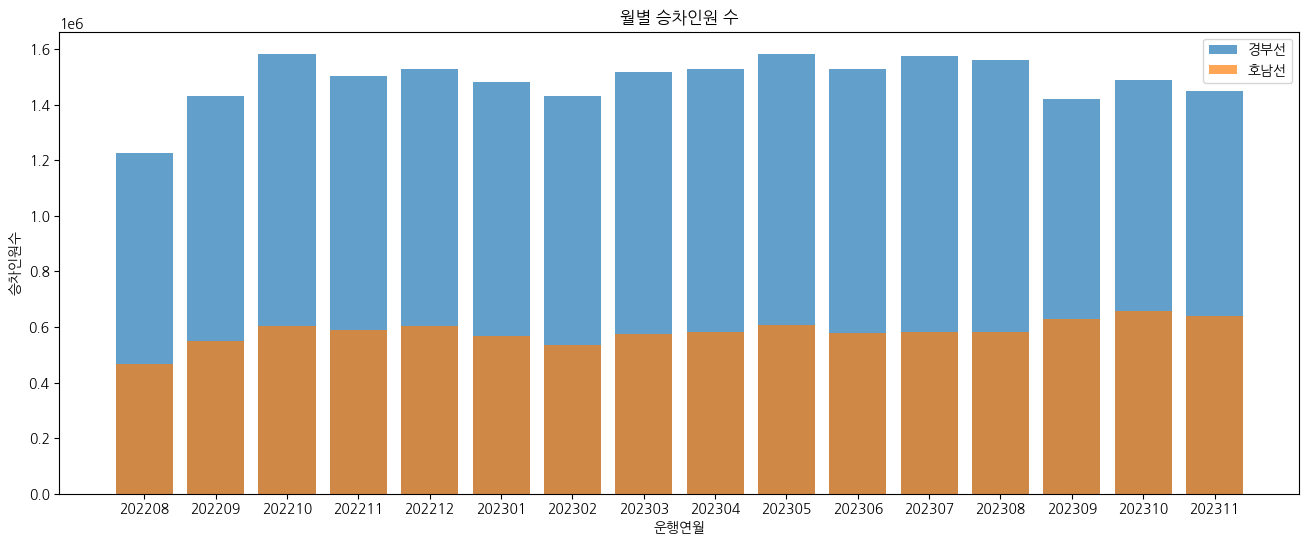

In [101]:
aggregated_df = r_df.groupby(['운행연월', '노선명'])['승차인원수'].sum().reset_index()
# Plotting the data using a bar chart
plt.figure(figsize=(16, 6))
for route, data in aggregated_df.groupby('노선명'):
    plt.bar(data['운행연월'], data['승차인원수'], label=route, alpha=0.7)

plt.xlabel('운행연월')
plt.ylabel('승차인원수')
plt.title('월별 승차인원 수')
plt.legend()
plt.show()

대체로 호남선 30%, 경부선 70% 정도의 비율로 경부선을 더 많이 이용

23년 8월에서 9월로 넘어갈 때 경부선은 줄어들고 호남선이 늘어나는 것 외에 모든 추세는 동일

ValueError: Cannot pass values for both `x` and `y`

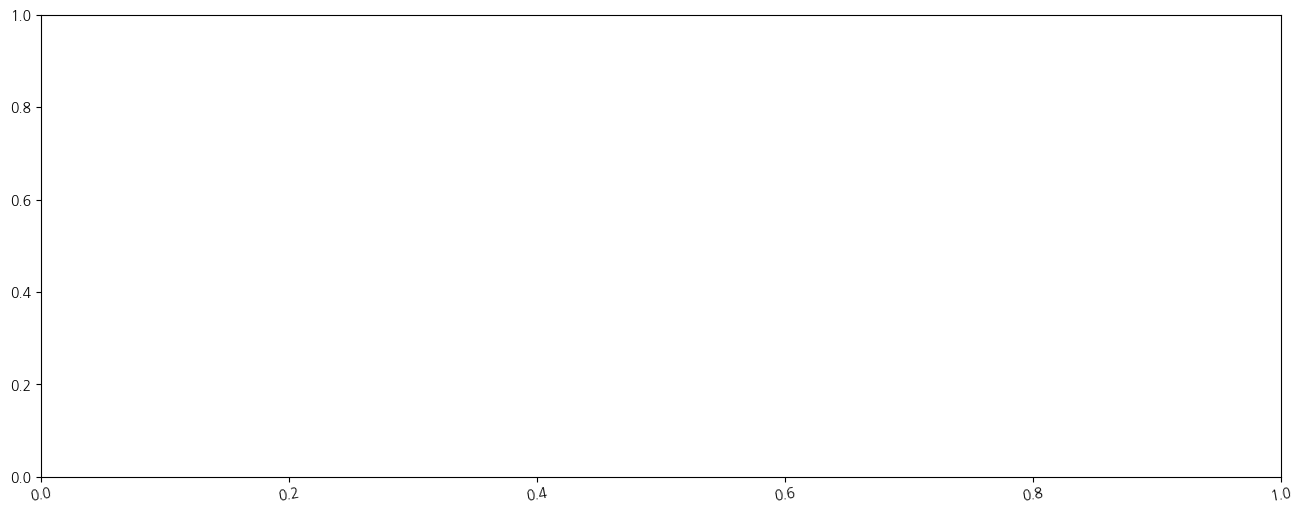

In [89]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=10)
sns.countplot(x='노선명', data=r_df, order=r_df['노선명'].value_counts().index)

In [ ]:
url = 'https://apis.data.go.kr/B553912/tk_sales/v1/channel_sales'

params = {
    'serviceKey': service_key,
    'page': 1,
    'perPage': 20000,
    'returnType': 'json',
    'cond[RUN_YMD::LT]': '20231231',
    'cond[RUN_YMD::LTE]': '20231231',
    'cond[RUN_YMD::GT]': '20220801', 
    'cond[RUN_YMD::GTE]': '20220801'
}

response = requests.get(url, params=params)
json.loads(response.content)

In [ ]:
url = 'https://apis.data.go.kr/B553912/tk_sales/v1/channel_sales'
results = []
per_page = 20000

for i in range(0,8):
    params = {
        'serviceKey': service_key,
        'page': i,
        'perPage': per_page,
        'returnType': 'json',
        'cond[RUN_YMD::GTE]': '20220801',
        'cond[RUN_YMD::LT]': '20231231'
    }
    
    response = requests.get(url, params=params)
    
    if(i==0):
        results = pd.DataFrame(json.loads(response.content)['data'])
    else:
        result = pd.DataFrame(json.loads(response.content)['data'])
        results.append(result)
    results.extend(result)
    print(f"데이터 불러오는 중 ... 현재 개수: {len(results)}")

In [ ]:
results.head()

In [5]:
# # Extracting the 'item' list
# item_list = dict_res['results']['data']['item']

# # Extracting 'col' information from each item
# columns = ['RUN_YMD', 'SELLNG_YMD', 'ROUTE_NM', 'SELLNG_STN_CD', 'SELLNG_STN_NM', 'SELLNG_QNTY', 'PRT_CMPTN_QNTY', 'RFND_QNTY']

# # Extracting information and creating a list of dictionaries for each item
# data_list = []
# for item in item_list:
#     col_info = item['col']
#     data_dict = {col['@name']: col['#text'] for col in col_info}
#     data_list.append(data_dict)

# # Creating a DataFrame using the list of dictionaries and specifying columns
# df = pd.DataFrame(data_list, columns=columns)

In [6]:
# df.head()

,RUN_YMD,SELLNG_YMD,ROUTE_NM,SELLNG_STN_CD,SELLNG_STN_NM,SELLNG_QNTY,PRT_CMPTN_QNTY,RFND_QNTY
0,20220801,20220801,경부선,0551,수서,732,635,81
1,20220801,20220801,경부선,0552,동탄,98,92,6
2,20220801,20220801,경부선,0553,지제,141,129,11
3,20220801,20220801,호남선,0551,수서,374,310,59
4,20220801,20220801,호남선,0552,동탄,70,66,4
